# Planche de Galton avec Micro:bit

Sur cette page, je vous propose une *planche de Galton*, version **Micro:bit**.
Le code suivant a été édité avec *mu* [site officiel](https://codewith.mu/), en local sur mon ordinateur. Très pratique pour développer en Python.

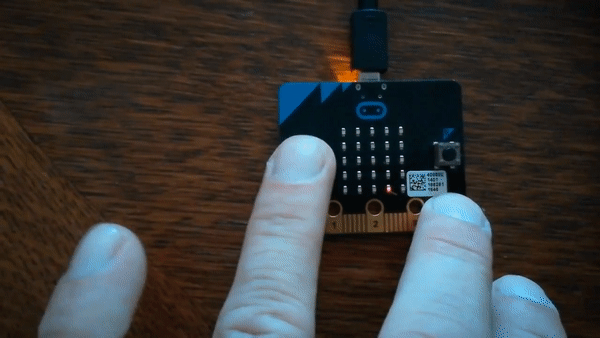

Normalement, le code ne peut s'exécuter dans cette fenêtre car la bibliothèque *microbit* n'est pas forcément présente sur le serveur… (ou quelque chose comme ça)


In [1]:
# -*- coding: utf-8-*-# Encoding cookie added by Mu Editor
from microbit import *
import random

# Définition des constantes
#  * pause = durée maximale lors de l'animation
#            après je diminuerai cette valeur
#            pour accélérer
# * luMax = luminositée maximale des diodes
# * tableauEffectif = effectifs de chaque valeur déjà apparues
#                    lors de l'animation
pause = 200
luMax = 6
tableauEffectif = [0 for _ in range(5)]


# fonction
# déplace un pixel de l'ancienne position à la nouvelle position
# (utile lors de la chute des points)
def parcours(oldX, oldY, newX, newY):
    display.set_pixel(oldX, oldY, 0)
    display.set_pixel(newX, newY, 9)

    
# fonction
# affichage du diagramme en barre
# chaque pixel de chaque barre représente un certain effectif
# la luminosité du pixel représente l'effectif : 
# effectif = 1 => hauteur y=4 : luminosité = 1
# effectif = 3 => hauteur y=4 : luminosité = 2
# ...
# effectif = luMax => hauteur y=4 : luminosité = luMax
# effectif = luMax+1 => hauteur y=4 : luminosité = luMax
#                       hauteur y=3 : luminosité = 1
#
# j'utilise donc la division euclidienne de l'effectif par luMax
# la partie entière (appelé "entier") et le reste (appelé "lum")
def diagramme(monTableau, luMax):
    stop = False
    reste = luMax
    
    # affichage des colonnes une par une, en commençant par la 0
    for x in range(5):
        # on se place en bas
        y = 4
        
        # divisieur euclidienne
        entier = int(monTableau[x]/reste)
        lum = monTableau[x] % reste
        
        # vérification que le tableau est plein 
        # (et dans ce cas, on arrête tout)
        # sinon, on éclaire à fond "entier" ligne
        if entier == 4 and lum == luMax-1:
            stop = True
        for ligne in range(entier):
            display.set_pixel(x, y, luMax)
            y -= 1
            
        # et puis on éclaire avec la luminosité "lum" (=le reste)
        # le pixel du haut
        display.set_pixel(x, y, lum)
    # si le digramme est complet, on arrête
    if stop:
        return False
    else:
        return True

    
while True:
    if button_a.is_pressed():
        tableauEffectif = [0 for _ in range(5)]
        pause = 200
        display.clear()
        x, y = 0, 0
        print(x, y)
        display.set_pixel(x, y, 9)
        sleep(pause)
        for y in range(1, 5):
            oldX = x
            x = x + random.randint(0, 1)
            parcours(oldX, y-1, x, y)
            print(x, y)
            sleep(pause)
        tableauEffectif[x] += 1
        diagramme(tableauEffectif, luMax)
        sleep(pause)
    if button_b.is_pressed():
        pause = 200
        tableauEffectif = [0 for _ in range(5)]
        display.clear()
        encore = True
        while encore:
            x, y = 0, 0
            display.set_pixel(x, y, 9)
            sleep(pause)
            for y in range(1, 5):
                oldX = x
                x = x + random.randint(0, 1)
                parcours(oldX, y-1, x, y)
                sleep(pause)
            tableauEffectif[x] += 1                
            encore = diagramme(tableauEffectif, luMax)
            print(tableauEffectif)
            sleep(pause)
            pause = pause * 0.9

ModuleNotFoundError: No module named 'microbit'